---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

# Spam Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

spam_data = pd.read_csv('spam.csv')

spam_data['target'] = np.where(spam_data['target']=='spam',1,0)
spam_data.head(10)

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


## Train & Test Split:

In [2]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(spam_data['text'], 
                                                    spam_data['target'], 
                                                    random_state=0)

### Dummy Classifier

In [78]:
from sklearn.dummy import DummyClassifier
model=DummyClassifier(strategy='most_frequent')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8585786073223259

Therefore, The dataset is imbalanced. Not Spam is majority class. 

Hence we need to perform atleast better than 86% to beat the dummy classifier

## EDA

### What percentage of the documentsare spam?



<BarContainer object of 2 artists>

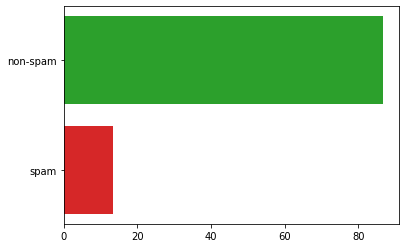

In [17]:
spam_perc=(spam_data['target']==1).sum()*100/spam_data.shape[0]
non_spam_perc=100-spam_perc
plt.barh(y=['spam','non-spam'],width=[spam_perc,non_spam_perc],color=['tab:red','tab:green'])

### Longest token

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
count.fit(X_train)
maxlength=max(map(len,count.get_feature_names()))
print("Longest token: ",[i for i in count.get_feature_names() if len(i)==maxlength][0])
    


Longest token:  com1win150ppmx3age16subscription


### What 20 features have the smallest tf-idf and what 20 have the largest tf-idf?

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

count=TfidfVectorizer(min_df=3)
X_train_vectorized=count.fit_transform(X_train)
features=np.array(count.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
smallest=features[sorted_tfidf_index[0:20]]
largest=features[sorted_tfidf_index[-20:]]
tfidf=X_train_vectorized.max(0).toarray()[0]
tfidf.sort()
smallest_tfidf=tfidf[0:20]
largest_tfidf=tfidf[-20:]
s=pd.Series(smallest_tfidf,index=smallest)
s=s.iloc[np.lexsort([s.index,s.values])]
l=pd.Series(largest_tfidf,index=largest)
l=l.iloc[np.lexsort([l.index,l.values])]
print("smallest tfidf: ")
print(s)
print("largest tfidf: ")
print(l)

smallest tfidf: 
moral              0.204078
36504              0.215685
sum1               0.216737
100percent         0.217856
genuine            0.217856
showing            0.218333
crack              0.219528
havnt              0.219528
honeybee           0.219528
laughed            0.219528
sweetest           0.219528
norm150p           0.219653
w45wq              0.219653
minnaminunginte    0.220250
nurungu            0.220250
vettam             0.220250
affection          0.224637
bcums              0.224637
kettoda            0.224637
manda              0.224637
dtype: float64
largest tfidf: 
anytime    1.0
babe       1.0
bags       1.0
done       1.0
er         1.0
for        1.0
or         1.0
out        1.0
right      1.0
sad        1.0
say        1.0
space      1.0
thank      1.0
thanx      1.0
those      1.0
too        1.0
towards    1.0
type       1.0
unsold     1.0
where      1.0
dtype: float64


### Average length of documents (number of characters) for not spam and spam documents


Average length of Non-Spam data: 71.02362694300518
Average length of Spam data: 138.8661311914324


Text(0.5, 0, 'Avg. Number of charcters')

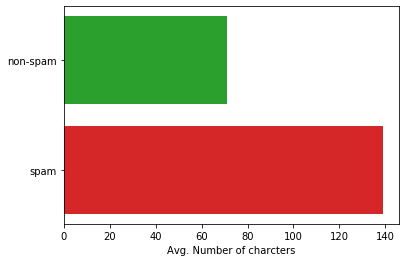

In [20]:
notspam=spam_data[spam_data['target']==0]['text']
spam=spam_data[spam_data['target']==1]['text']
len_spam=np.mean([i for i in map(len,spam)])
len_not_spam=np.mean([i for i in map(len,notspam)])
print("Average length of Non-Spam data:",len_not_spam)
print("Average length of Spam data:",len_spam)
plt.barh(y=['spam','non-spam'],width=[len_spam,len_not_spam],color=['tab:red','tab:green'])
plt.xlabel('Avg. Number of charcters')


### Average number of digits per document for not spam and spam documents?



Average number of digits in non-spam Docs: 0.2992746113989637
Average number of digits in spam Docs: 15.759036144578314


Text(0.5, 0, 'Avg. Number of digits')

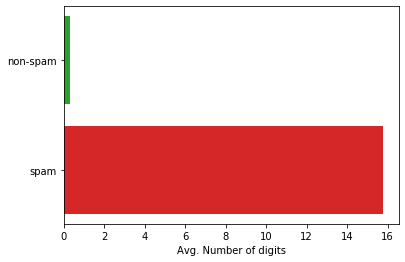

In [21]:

notspam=spam_data[spam_data['target']==0]['text']
spam=spam_data[spam_data['target']==1]['text']
char_spam=[i for i in map(list,spam)]
char_not_spam=[i for i in map(list,notspam)]
spam_mean_digits=np.mean([j for j in map(lambda x: sum([i for i in map(str.isdigit,x)]),char_spam)])
notspam_mean_digits=np.mean([j for j in map(lambda x: sum([i for i in map(str.isdigit,x)]),char_not_spam)])
    
print("Average number of digits in non-spam Docs:" ,notspam_mean_digits)
print("Average number of digits in spam Docs:" ,spam_mean_digits)

plt.barh(y=['spam','non-spam'],width=[spam_mean_digits,notspam_mean_digits],color=['tab:red','tab:green'])
plt.xlabel('Avg. Number of digits')

### Average number of non-word characters (anything other than a letter, digit or underscore) per document for not spam and spam documents


Average number of non-word characters in non-spam docs:  17.29181347150259
Average number of non-word characters in spam docs:  29.041499330655956


Text(0.5, 0, 'Avg. number of non-word characters')

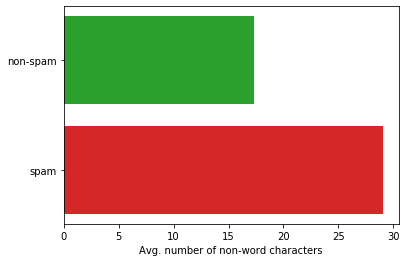

In [22]:
import re
notspam=spam_data[spam_data['target']==0]['text']
spam=spam_data[spam_data['target']==1]['text']
char_spam=[i for i in map(list,spam)]
char_not_spam=[i for i in map(list,notspam)]
spam_nonwords=np.mean([j for j in map(lambda x: sum([i for i in map(lambda y: bool(re.search(r'\W',y)),x)]),char_spam)])
nonspam_nonwords=np.mean([j for j in map(lambda x: sum([i for i in map(lambda y:bool(re.search(r'\W',y)),x)]),char_not_spam)])
print("Average number of non-word characters in non-spam docs: ",nonspam_nonwords)
print("Average number of non-word characters in spam docs: ",spam_nonwords)
plt.barh(y=['spam','non-spam'],width=[spam_nonwords,nonspam_nonwords],color=['tab:red','tab:green'])
plt.xlabel('Avg. number of non-word characters')

### Multinomial NaiveBayes:
Default Config, No addition features

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score


count=CountVectorizer()
X_train_vectorized=count.fit_transform(X_train)
model=MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized,y_train)
predictions=model.predict(count.transform(X_test))
score=roc_auc_score(y_test,predictions)
    
print("Number of Features: ",X_train_vectorized.shape[1])
print("Roc Auc Score: ",score)

### Question 11

Count Vectorizer ignoring terms that have a document frequency strictly lower than **5** and using **character n-grams from n=2 to n=5.**

To tell Count Vectorizer to use character n-grams pass in `analyzer='char_wb'` which creates character n-grams only from text inside word boundaries. This should make the model more robust to spelling mistakes.

Using this document-term matrix and the following additional features:
* the length of document (number of characters)
* number of digits per document
* **number of non-word characters (anything other than a letter, digit or underscore.)**

Logistic Regression model with regularization C=100. Then compute the area under the curve (AUC) score using the transformed test data.

**find the 10 smallest and 10 largest coefficients from the model** and return them along with the AUC score in a tuple.

The list of 10 smallest coefficients should be sorted smallest first, the list of 10 largest coefficients should be sorted largest first.


# Feature Engineering:

In [30]:
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
temp = spam_data.copy()
temp['length_of_doc'] = temp['text'].str.len()
temp['digit_count'] = spam_data['text'].apply(lambda row: len(re.findall(r'\d', row)))
temp['non_word_char_count'] = temp['text'].apply(lambda row: len(re.findall(r'\W', row)))
X_train, X_test, y_train, y_test = train_test_split(temp.drop('target', axis=1), temp['target'], random_state=0)

vect = CountVectorizer(min_df=5, ngram_range=(2, 5), analyzer='char_wb').fit(X_train['text'])

X_train_vectorized = vect.transform(X_train['text'])
X_test_vectorized = vect.transform(X_test['text'])
X_train_vectorized = add_feature(X_train_vectorized, X_train['length_of_doc'])
X_train_vectorized = add_feature(X_train_vectorized, X_train['digit_count'])
X_train_vectorized = add_feature(X_train_vectorized, X_train['non_word_char_count'])
X_test_vectorized = add_feature(X_test_vectorized, X_test['length_of_doc'])
X_test_vectorized = add_feature(X_test_vectorized, X_test['digit_count'])
X_test_vectorized = add_feature(X_test_vectorized, X_test['non_word_char_count'])



## Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import warnings 
warnings.filterwarnings("ignore")

clf = LogisticRegression(C=100).fit(X_train_vectorized, y_train)
y_score = clf.predict(X_test_vectorized)
score = roc_auc_score(y_test, y_score)
    
feature_names = np.append(np.array(vect.get_feature_names()), ['length_of_doc', 'digit_count', 'non_word_char_count'])
sorted_coef_index = clf.coef_[0].argsort()
largest_coefs = feature_names[sorted_coef_index[:-11:-1]]
smallest_coefs = feature_names[sorted_coef_index[:10]]
    
score, list(smallest_coefs), list(largest_coefs)

(0.9813973821367333,
 ['..', '. ', ' i', ' go', '? ', ' y', 'pe', 'ok', 'go', 'h '],
 ['digit_count', 'ww', 'co', 'ne', 'ia', 'xt', 'ar', ' ch', 'mob', 'uk'])

In [63]:
from sklearn.svm import SVC
model=SVC(C=100000)
model.fit(X_train_vectorized,y_train)
predictions=model.predict(X_test_vectorized)
auc=roc_auc_score(y_test,predictions)
auc

0.9767393002054223

In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score


model=MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized,y_train)
predictions=model.predict(X_test_vectorized)
auc=roc_auc_score(y_test,predictions)
auc
print("Number of Features: ",X_train_vectorized.shape[1])
print("Roc Auc Score: ",auc)

Number of Features:  16317
Roc Auc Score:  0.9818451521993787


### Using Multinomial Naive Bayes an accuracy of 98.18% is acheived